In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data_pd = pd.read_csv('clean2.data', header=None)
data = data_pd.to_numpy()

In [12]:
X = data[:, 2:-1]
y = data[:, -1]
X = X.astype(int)
y = y.astype(int)

In [13]:
def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x

In [14]:
X = standardize(X)

In [99]:
losses = []

In [70]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        losses = []
    
    def __b_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid_function(self, z):
        z = z.astype(float)
        #print(type(z))
        z = -z
        expo = np.exp(z)
        return 1 / (1 + expo)
    
    def __loss(self, yp, y):
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    def fit(self, X, y):
        
        
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        
        self.W = np.zeros(X.shape[1])
        
        
        for i in range(self.num_iterations):
            
            
            z = np.dot(X, self.W)
            
            
            yp = self.__sigmoid_function(z)
            
            
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            #print(self.W.shape)
            self.W =self.W - self.learning_rate * gradient
            
            
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            
            loss = self.__loss(yp, y)
            losses.append(loss)
            
            
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        return self.__sigmoid_function(np.dot(X, self.W))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [71]:
model = LogisticRegression(learning_rate=0.1, num_iterations=2000)
model.fit(X, y)

In [72]:
preds = model.predict(X)
(preds == y).mean()

0.9393755683540467

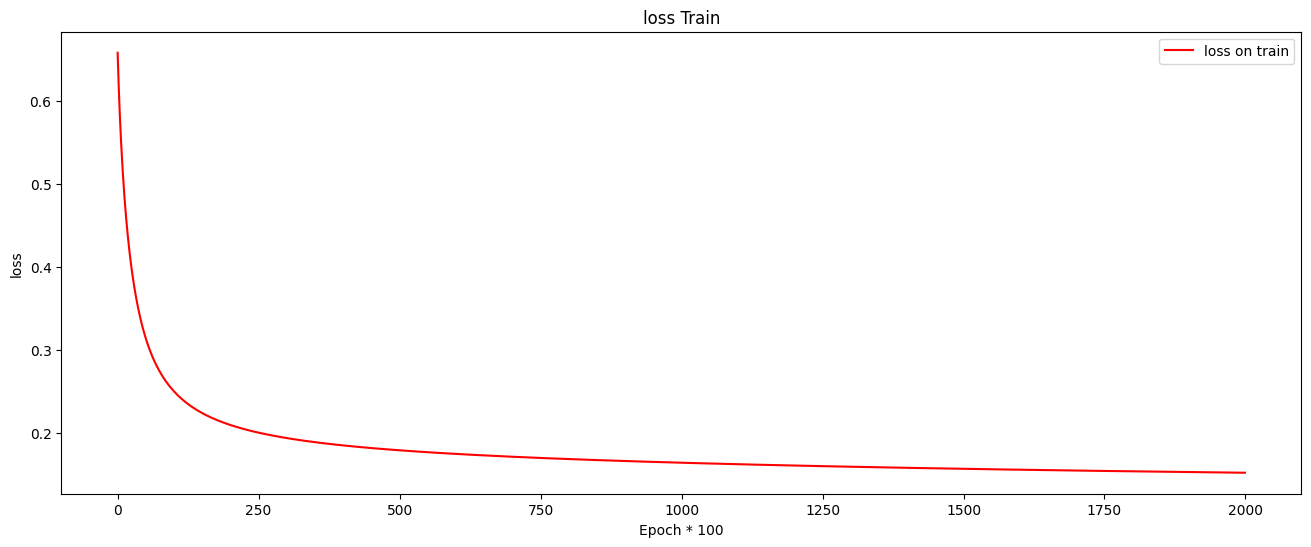

In [73]:
def plot_loss(losses):
    plt.figure(figsize=(16,6))

    plt.plot(losses, color='r', label='loss on train')

    plt.title('loss Train')
    plt.xlabel('Epoch * 100')
    plt.ylabel('loss')
    plt.legend()

    plt.show()
plot_loss(losses)
losses = []

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5581
           1       0.88      0.70      0.78      1017

    accuracy                           0.94      6598
   macro avg       0.91      0.84      0.87      6598
weighted avg       0.94      0.94      0.94      6598



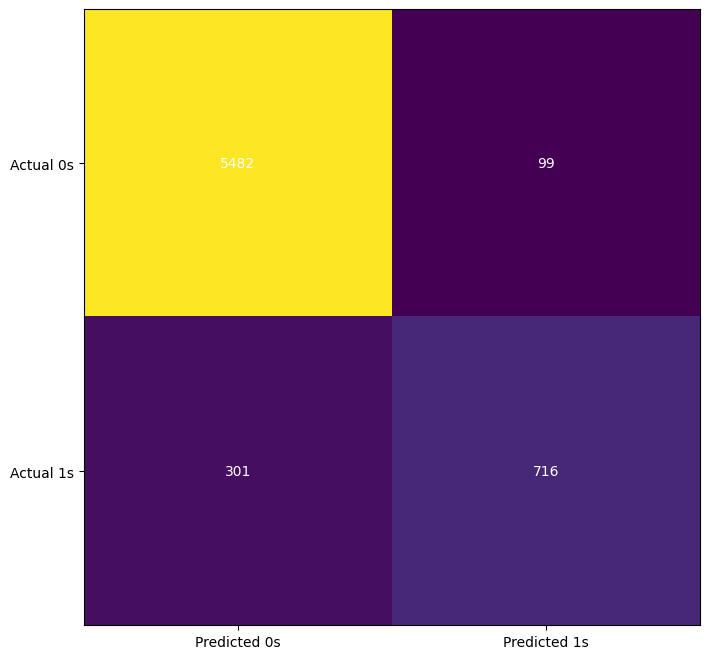

In [29]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [111]:
#calculate accuracy
acc_model1 = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print(acc_model1)

0.9393755683540467


In [75]:
data_test_pd = pd.read_csv('clean1.data', header=None)
data_test = data_test_pd.to_numpy()
X_test = data_test[:, 2:-1]
y_test = data_test[:, -1]
X_test = X_test.astype(int)
X_test = standardize(X_test)
y_test = y_test.astype(int)

In [76]:
preds_test = model.predict(X_test)
(preds_test == y_test).mean()

0.7331932773109243

In [77]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.98      0.81       269
           1       0.94      0.41      0.57       207

    accuracy                           0.73       476
   macro avg       0.81      0.70      0.69       476
weighted avg       0.80      0.73      0.70       476



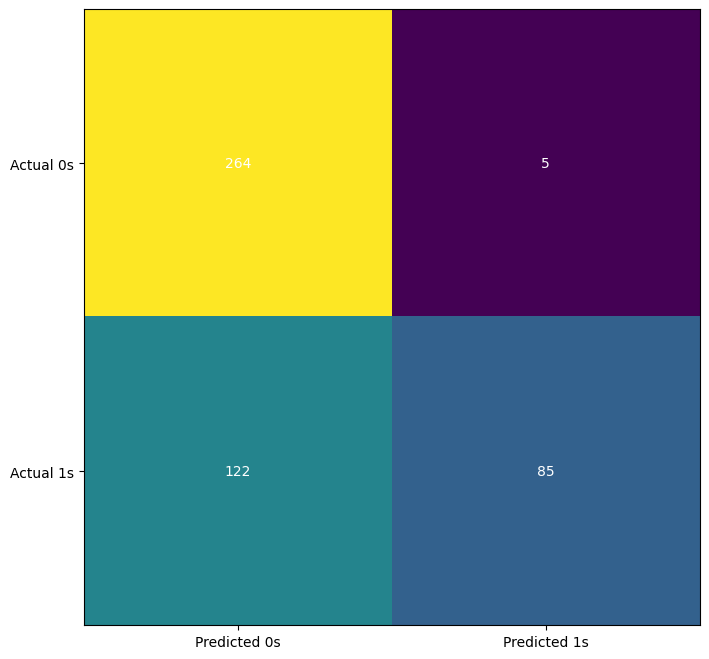

In [113]:
cm_test = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_test[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
#calculate accuracy
acc_model1 = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print(acc_model1)

In [95]:
#small learning rate
model2 = LogisticRegression(learning_rate=0.01, num_iterations=2000)
model2.fit(X, y)
preds = model2.predict(X)
(preds == y).mean()

0.9292209760533495

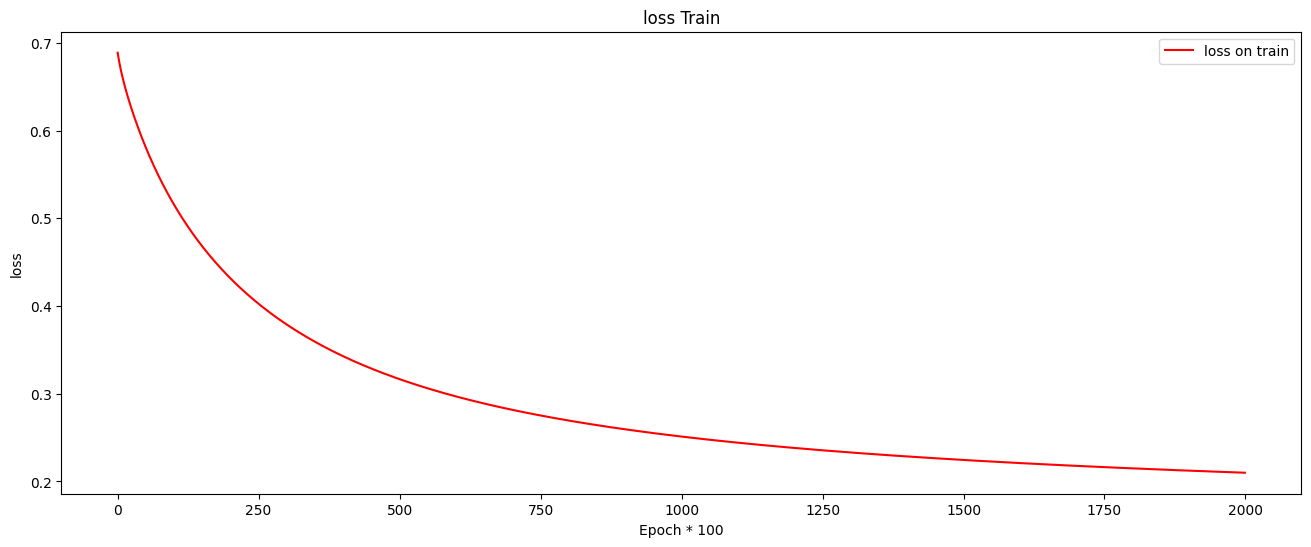

In [96]:
plot_loss(losses)
losses = []

In [97]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5581
           1       0.87      0.64      0.74      1017

    accuracy                           0.93      6598
   macro avg       0.90      0.81      0.85      6598
weighted avg       0.93      0.93      0.92      6598



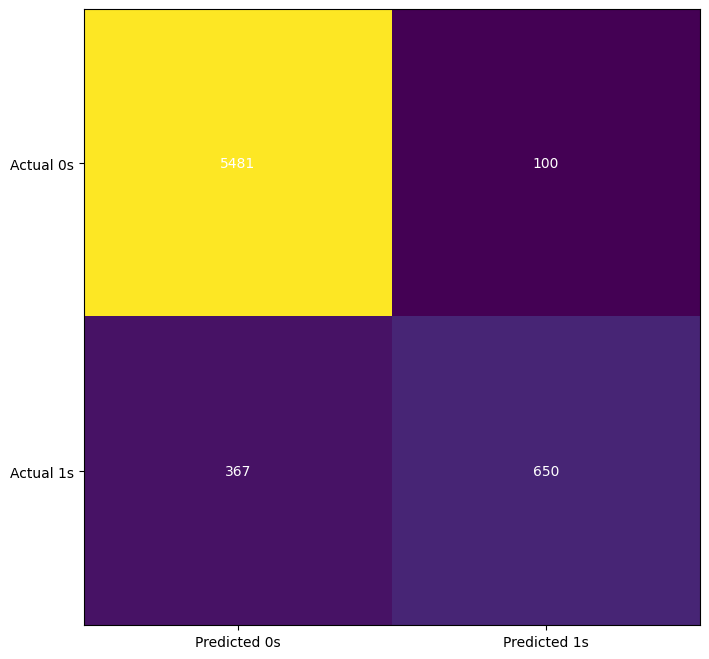

In [112]:
cm = confusion_matrix(y, model2.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [114]:
#calculate accuracy
acc_model2 = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print(acc_model2)

0.9292209760533495


In [100]:
#very small learning rate
model3 = LogisticRegression(learning_rate=0.001, num_iterations=2000)
model3.fit(X, y)
preds = model3.predict(X)
(preds == y).mean()

0.8814792361321613

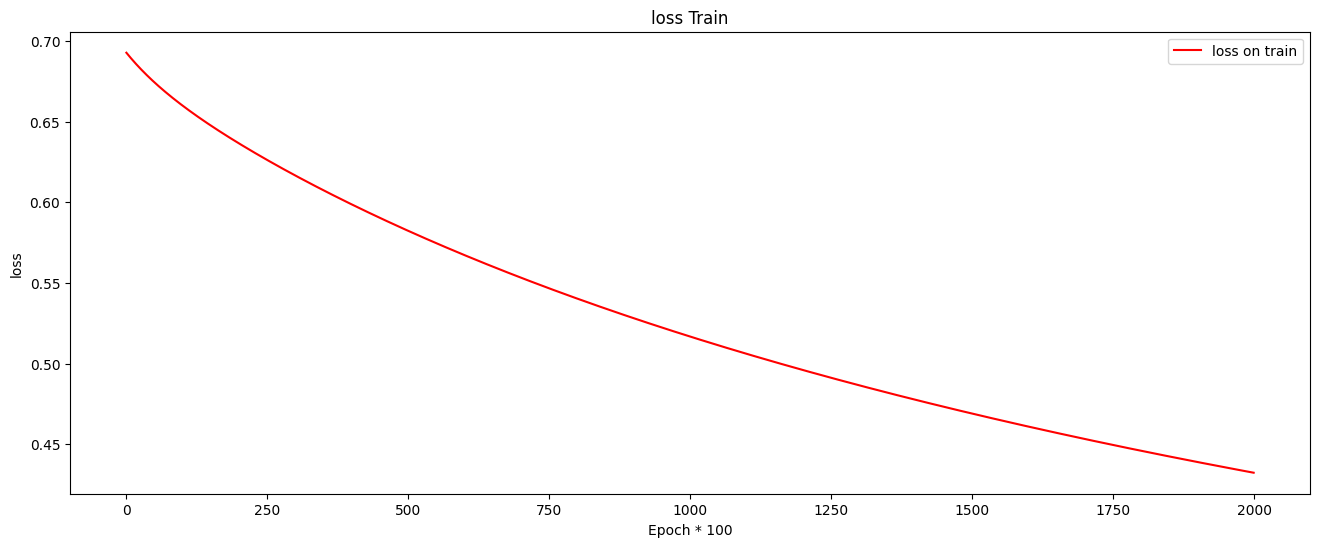

In [101]:
plot_loss(losses)
losses = []

In [102]:
print(classification_report(y, model3.predict(X)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5581
           1       0.59      0.75      0.66      1017

    accuracy                           0.88      6598
   macro avg       0.77      0.83      0.79      6598
weighted avg       0.90      0.88      0.89      6598



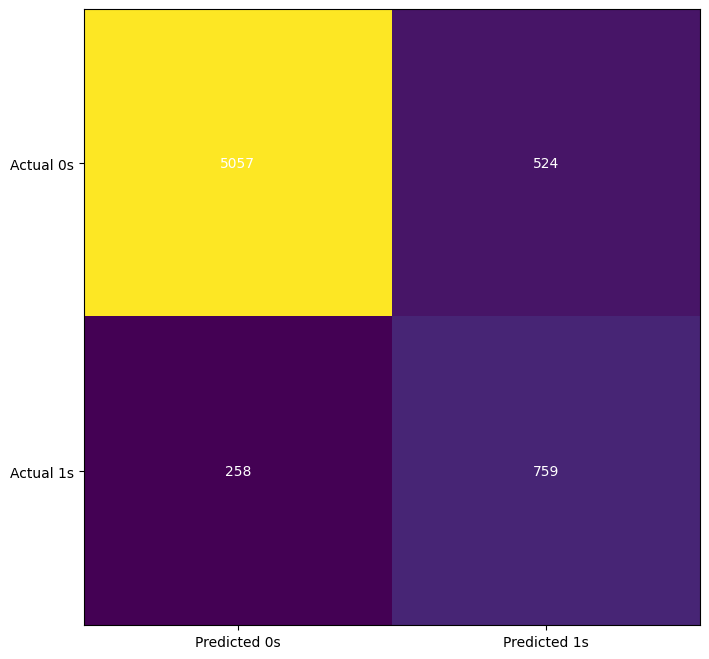

In [115]:
cm = confusion_matrix(y, model3.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [116]:
#calculate accuracy
acc_model3 = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print(acc_model3)

0.8814792361321613
